In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
data.shape

(10, 15)

In [7]:
data
transactions = []
for i in range (0,10):
    transactions.append([str(data.values[i,u]) for u in range(1,14)])

In [8]:
movie_series = pd.DataFrame(pd.Series(transactions))
movie_series
movie_series.columns = ['my movies']
movie_series

,my movies
0,"[LOTR1, Harry Potter1, Green Mile, LOTR2, 1, 0..."
1,"[Patriot, Braveheart, nan, nan, 0, 1, 0, 0, 1,..."
2,"[LOTR2, nan, nan, nan, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
3,"[Patriot, Sixth Sense, nan, nan, 1, 1, 0, 0, 1..."
4,"[Patriot, Sixth Sense, nan, nan, 1, 1, 0, 0, 1..."
5,"[Patriot, Sixth Sense, nan, nan, 1, 1, 0, 0, 1..."
6,"[Harry Potter2, nan, nan, nan, 0, 0, 0, 1, 0, ..."
7,"[Patriot, nan, nan, nan, 0, 1, 0, 0, 1, 0, 0, ..."
8,"[Patriot, Sixth Sense, nan, nan, 1, 1, 0, 0, 1..."
9,"[LOTR, Gladiator, Green Mile, nan, 1, 1, 0, 0,..."


In [9]:
X = movie_series['my movies'].str.join(sep=',').str.get_dummies(sep=',')
X

,0,1,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense,nan
0,1,1,0,0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1,0,1
2,1,1,0,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,0,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0,1,1,1
5,1,1,0,0,0,0,0,0,0,0,1,1,1
6,1,1,0,0,0,0,1,0,0,0,0,0,1
7,1,1,0,0,0,0,0,0,0,0,1,0,1
8,1,1,0,0,0,0,0,0,0,0,1,1,1
9,1,1,0,1,1,0,0,1,0,0,0,0,1


(array([[7., 0., 0., 0., 0., 0., 0., 0., 0., 6.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 4.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 4.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 4.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 5.],
        [7., 0., 0., 0., 0., 0., 0., 0., 0., 6.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Lists of Patches objects>)

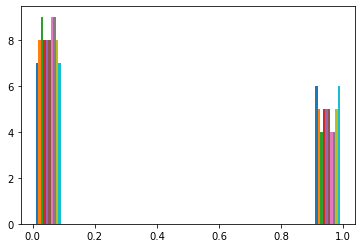

In [18]:
plt.hist(X)

# Apriori

In [11]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets= apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,1.0,(0)
1,1.0,(1)
2,0.1,(Braveheart)
3,0.1,(Gladiator)
4,0.2,(Green Mile)
...,...,...
109,0.1,"(Green Mile, LOTR2, Harry Potter1)"
110,0.1,"(nan, Green Mile, LOTR)"
111,0.1,"(Green Mile, LOTR2, LOTR1)"
112,0.1,"(LOTR2, Harry Potter1, LOTR1)"


In [12]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support               itemsets
0       1.0                    (0)
1       1.0                    (1)
13      1.0                 (1, 0)
24      0.9               (nan, 0)
35      0.9               (nan, 1)
..      ...                    ...
58      0.1  (Harry Potter1, 1, 0)
14      0.1        (Braveheart, 0)
56      0.1      (1, Gladiator, 0)
55      0.1     (1, Braveheart, 0)
69      0.1   (Gladiator, LOTR, 0)

[114 rows x 2 columns]>

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
220,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
248,(Gladiator),"(LOTR, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
246,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
179,(Harry Potter1),"(0, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
181,(LOTR1),"(Harry Potter1, 0)",0.1,0.1,0.1,1.0,10.0,0.09,inf
242,(Gladiator),"(nan, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
239,"(nan, Green Mile)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
237,(LOTR),"(nan, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
236,(Gladiator),"(nan, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
233,"(nan, LOTR)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
